In [16]:
# Herramientas para EDA
import pandas as pd
import numpy as np
import sidetable as stb
from datetime import timedelta
from datetime import date, datetime
import random 

# Herramientas para la Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.gridspec import GridSpec

# Transformación de datos

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Estadísticos
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

plt.rcParams["figure.figsize"] = (16,8)

import warnings
warnings.filterwarnings('ignore')

In [17]:
cd2=pd.read_csv('../project-da-promo-c-module-3-team-3/archivos/bikes_eda.csv', index_col=0)
cd2.head(20)

,fecha,estacion,año,mes,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,14.110847,80.5833,10.749882,331,654,985,lunes
1,2018-01-02,invierno,0,1,No Festivo,14.902598,69.6087,16.652113,131,670,801,martes
2,2018-01-03,invierno,0,1,No Festivo,8.050924,43.7273,16.636703,120,1229,1349,miercoles
3,2018-01-04,invierno,0,1,No Festivo,8.200000,59.0435,10.739832,108,1454,1562,jueves
4,2018-01-05,invierno,0,1,No Festivo,9.305237,43.6957,12.522300,82,1518,1600,viernes
5,2018-01-06,invierno,0,1,No Festivo,8.378268,51.8261,6.000868,88,1518,1606,sabado
6,2018-01-07,invierno,0,1,No Festivo,8.057402,49.8696,11.304642,148,1362,1510,domingo
7,2018-01-08,invierno,0,1,No Festivo,6.765000,53.5833,17.875868,68,891,959,lunes
8,2018-01-09,invierno,0,1,No Festivo,5.671653,43.4167,24.250650,54,768,822,martes
9,2018-01-10,invierno,0,1,No Festivo,6.184153,48.2917,14.958889,41,1280,1321,miercoles


<AxesSubplot:>

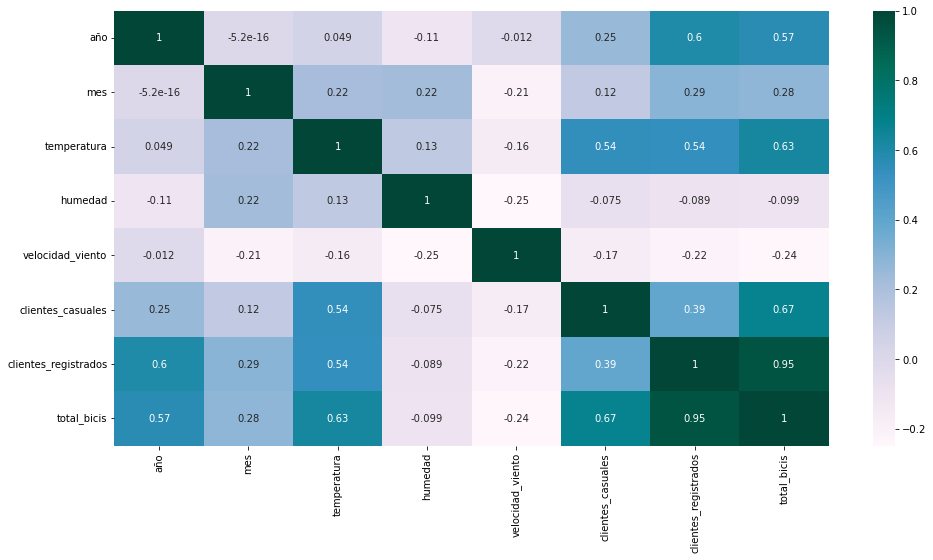

In [18]:
sns.heatmap(cd2.corr(), cmap= 'PuBuGn', annot= True)

In [19]:
cd2['dia_semana'].value_counts()

lunes        105
martes       105
miercoles    104
jueves       104
viernes      104
sabado       104
domingo      104
Name: dia_semana, dtype: int64

In [20]:
df_sabdo=cd2[(cd2['dia_semana']=='sabado')]

<AxesSubplot:>

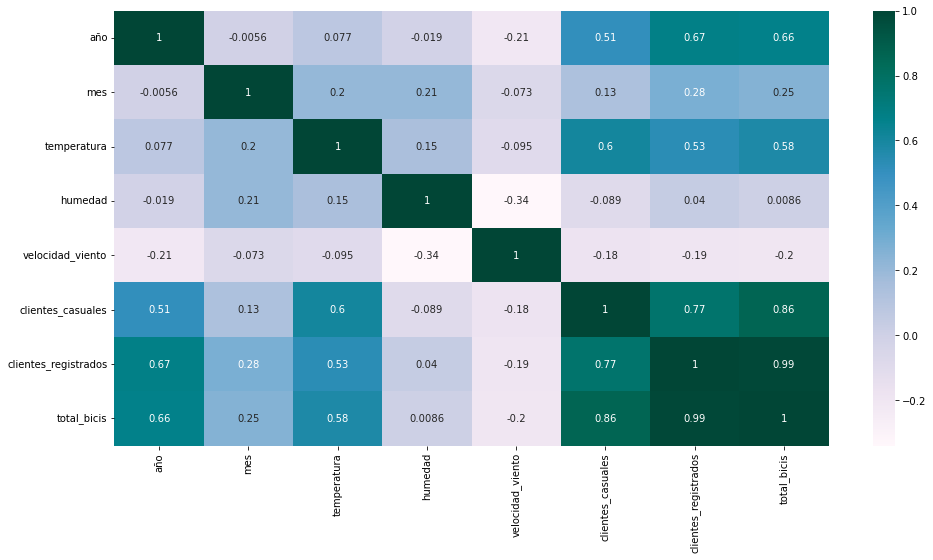

In [21]:
sns.heatmap(df_sabdo.corr(), cmap= 'PuBuGn', annot= True)

A la vista de ls correlaciones del sabado, lo incluimos dentro de no laborables, sigue una distribucion más parecida a esa condicion

In [22]:
df_no_laborables=cd2[(cd2['dias_festivos']!='No Festivo')|(cd2['dia_semana']=='domingo')|(cd2['dia_semana']=='sabado')]
df_no_laborables.head()

,fecha,estacion,año,mes,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,14.110847,80.5833,10.749882,331,654,985,lunes
5,2018-01-06,invierno,0,1,No Festivo,8.378268,51.8261,6.000868,88,1518,1606,sabado
6,2018-01-07,invierno,0,1,No Festivo,8.057402,49.8696,11.304642,148,1362,1510,domingo
12,2018-01-13,invierno,0,1,No Festivo,6.765000,47.0417,20.167000,38,1368,1406,sabado
13,2018-01-14,invierno,0,1,No Festivo,6.595670,53.7826,8.478716,54,1367,1421,domingo


In [23]:
df_no_laborables.describe()

,año,mes,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis
count,228.0000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,0.5000,6.605263,20.221428,61.907729,12.761128,963.850877,3618.964912,4582.815789
std,0.5011,3.516151,7.504287,14.436395,5.042751,846.841535,1413.937919,1999.779640
min,0.0000,1.000000,5.918268,0.000000,1.500244,15.000000,416.000000,431.000000
25%,0.0000,3.750000,13.957097,52.447900,9.166739,269.000000,2783.250000,3232.750000
50%,0.5000,7.000000,19.577500,62.416650,12.250113,735.500000,3720.500000,4572.000000
75%,1.0000,10.000000,26.863538,71.635425,15.483784,1320.500000,4559.750000,6045.500000
max,1.0000,12.000000,35.328347,97.250000,34.000021,3410.000000,6917.000000,8714.000000


In [24]:
df_laborables2=cd2[(cd2['dias_festivos']=='No Festivo')]#|(cd['dia_semana']!='domingo')|((cd['dia_semana']!='sabado'))]
df_laborables2.head()

,fecha,estacion,año,mes,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
1,2018-01-02,invierno,0,1,No Festivo,14.902598,69.6087,16.652113,131,670,801,martes
2,2018-01-03,invierno,0,1,No Festivo,8.050924,43.7273,16.636703,120,1229,1349,miercoles
3,2018-01-04,invierno,0,1,No Festivo,8.200000,59.0435,10.739832,108,1454,1562,jueves
4,2018-01-05,invierno,0,1,No Festivo,9.305237,43.6957,12.522300,82,1518,1600,viernes
5,2018-01-06,invierno,0,1,No Festivo,8.378268,51.8261,6.000868,88,1518,1606,sabado


In [25]:
df_laborables2.dia_semana.value_counts()

viernes      104
sabado       104
martes       103
domingo      103
miercoles    102
jueves       101
lunes         92
Name: dia_semana, dtype: int64

In [26]:
df_laborables=df_laborables2[(df_laborables2['dia_semana']=='lunes')|(df_laborables2['dia_semana']=='martes')|(df_laborables2['dia_semana']=='miercoles')|(df_laborables2['dia_semana']=='jueves')|(df_laborables2['dia_semana']=='viernes')]
df_laborables.head()

,fecha,estacion,año,mes,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
1,2018-01-02,invierno,0,1,No Festivo,14.902598,69.6087,16.652113,131,670,801,martes
2,2018-01-03,invierno,0,1,No Festivo,8.050924,43.7273,16.636703,120,1229,1349,miercoles
3,2018-01-04,invierno,0,1,No Festivo,8.200000,59.0435,10.739832,108,1454,1562,jueves
4,2018-01-05,invierno,0,1,No Festivo,9.305237,43.6957,12.522300,82,1518,1600,viernes
7,2018-01-08,invierno,0,1,No Festivo,6.765000,53.5833,17.875868,68,891,959,lunes


In [27]:
df_laborables.dia_semana.value_counts()

viernes      104
martes       103
miercoles    102
jueves       101
lunes         92
Name: dia_semana, dtype: int64

In [28]:
df_laborables['total_bicis'].sum()

2245963

In [29]:
df_no_laborables['total_bicis'].sum()

1044882

In [30]:
df_laborables.describe()

,año,mes,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,0.500000,6.490040,20.363693,63.154612,12.764751,797.199203,3676.830677,4474.029880
std,0.500499,3.422787,7.514900,14.143695,5.268855,593.375331,1622.691903,1907.407263
min,0.000000,1.000000,2.424346,27.583300,2.834381,2.000000,20.000000,22.000000
25%,0.000000,4.000000,13.760625,51.885425,8.959307,325.250000,2456.500000,3115.500000
50%,0.500000,6.500000,20.739153,62.791700,12.062780,711.500000,3633.000000,4544.500000
75%,1.000000,9.000000,26.880615,73.458300,15.706039,1053.500000,4986.250000,5914.750000
max,1.000000,12.000000,34.815847,97.041700,29.584721,2846.000000,6946.000000,8227.000000


<AxesSubplot:>

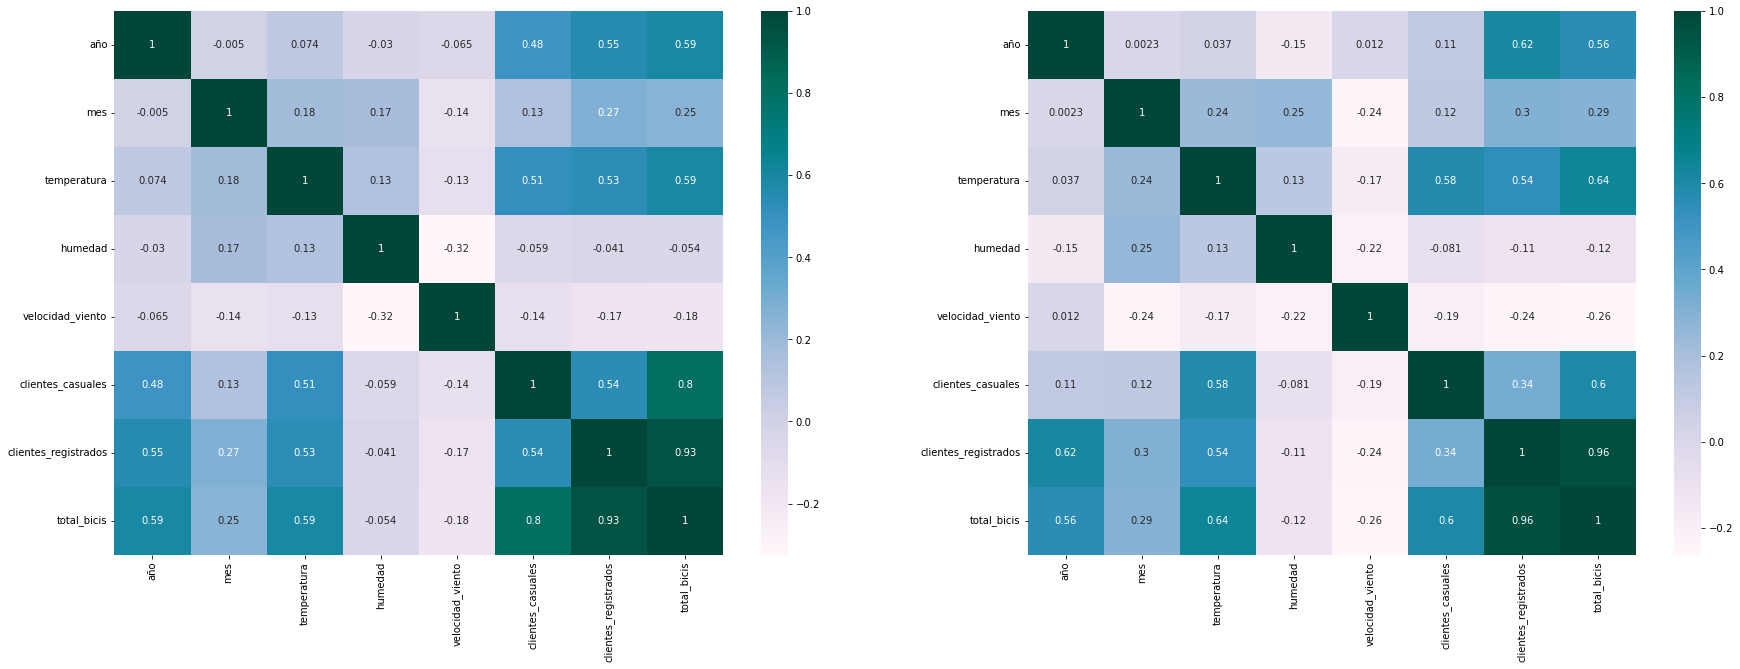

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
sns.heatmap(df_no_laborables.corr(), cmap= 'PuBuGn', annot= True, ax=axes[0])
sns.heatmap(df_laborables.corr(), cmap= 'PuBuGn', annot= True, ax=axes[1])

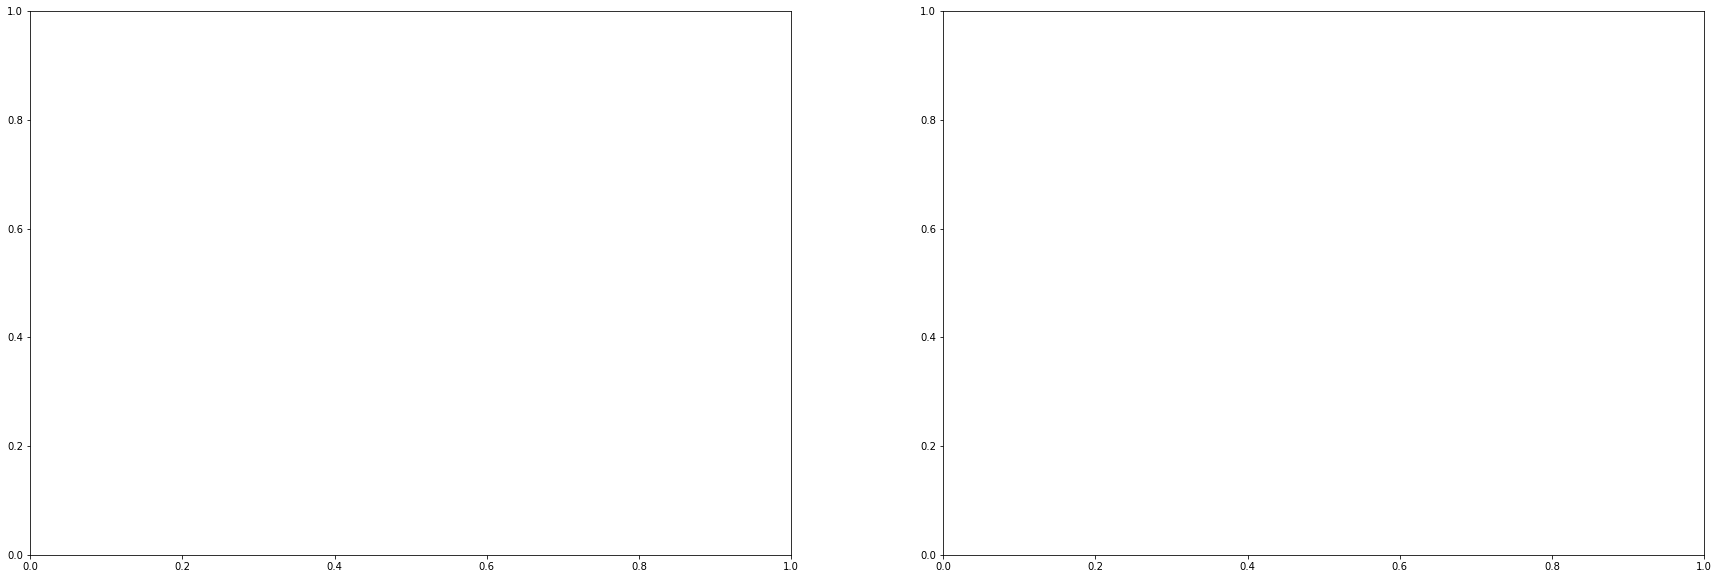

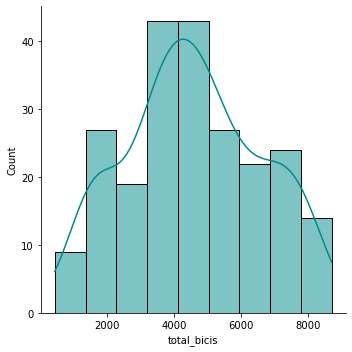

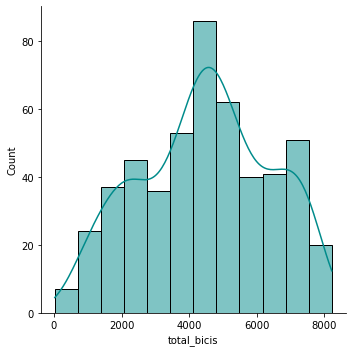

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
sns.displot(df_no_laborables['total_bicis'], kde = True, color = "darkcyan", ax=axes[0])
sns.displot(df_laborables['total_bicis'], kde = True, color = "darkcyan", ax=axes[1])

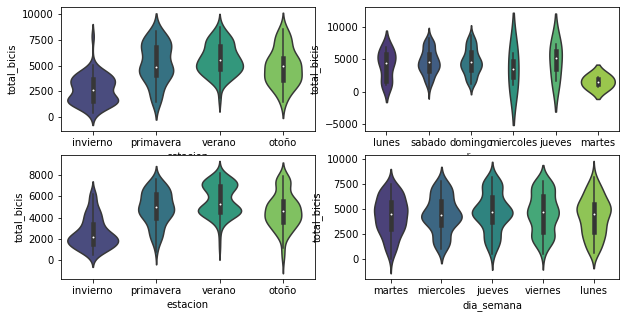

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

sns.violinplot(
    x       = 'estacion',
    y       = 'total_bicis',
    data    = df_no_laborables,
    palette = 'viridis',
    ax      = ax[0,0])
sns.violinplot(
    x       = 'dia_semana',
    y       = 'total_bicis',
    data    = df_no_laborables,
    palette = 'viridis',
    ax      = ax[0,1])

sns.violinplot(
    x       = 'estacion',
    y       = 'total_bicis',
    data    = df_laborables,
    palette = 'viridis',
    ax      = ax[1,0])
sns.violinplot(
    x       = 'dia_semana',
    y       = 'total_bicis',
    data    = df_laborables,
    palette = 'viridis',
    ax      = ax[1,1]);

<AxesSubplot:xlabel='dia_semana', ylabel='clientes_registrados'>

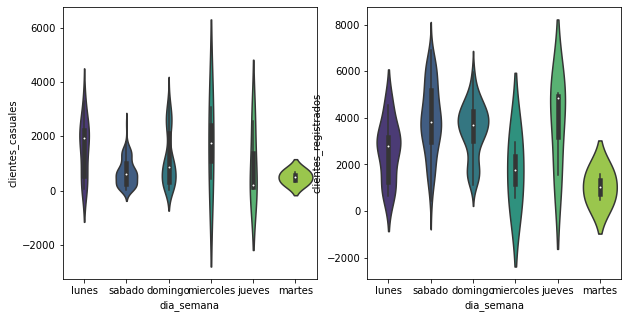

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


sns.violinplot(
    x       = 'dia_semana',
    y       = 'clientes_casuales',
    data    = df_no_laborables,
    palette = 'viridis',
    ax      = ax[0])

sns.violinplot(
    x       = 'dia_semana',
    y       = 'clientes_registrados',
    data    = df_no_laborables,
    palette = 'viridis',
    ax      = ax[1])

<AxesSubplot:xlabel='dia_semana', ylabel='clientes_registrados'>

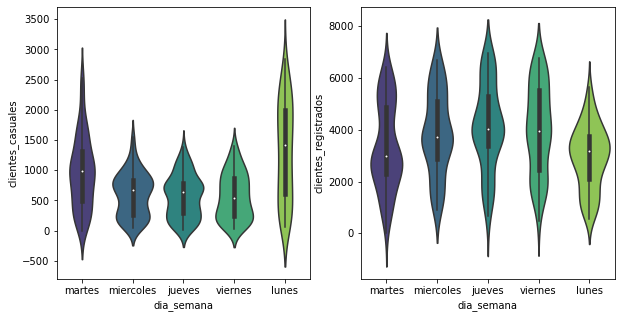

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


sns.violinplot(
    x       = 'dia_semana',
    y       = 'clientes_casuales',
    data    = df_laborables,
    palette = 'viridis',
    ax      = ax[0])


sns.violinplot(
    x       = 'dia_semana',
    y       = 'clientes_registrados',
    data    = df_laborables,
    palette = 'viridis',
    ax      = ax[1])

Las previsiones por dia de la semana, segun no laborables, las medianas, son más parecidas entre los dos grupos de clientes,salvo en los sabados, que hemos considerado no laborable, aunque lo sea, porque las correlaciones lo indicaban asi, mientras que en laborables, la prevision de registrados, casi dobla a los no casuales segun medianas(como ocurre en sabados de no laborables).Metemos sabados en laborables de nuevo.

In [38]:
df_no_laborables=cd2[(cd2['dias_festivos']!='No Festivo')|(cd2['dia_semana']=='domingo')]
df_no_laborables.head()

,fecha,estacion,año,mes,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,14.110847,80.5833,10.749882,331,654,985,lunes
6,2018-01-07,invierno,0,1,No Festivo,8.057402,49.8696,11.304642,148,1362,1510,domingo
13,2018-01-14,invierno,0,1,No Festivo,6.595670,53.7826,8.478716,54,1367,1421,domingo
14,2018-01-15,invierno,0,1,Martin Luther King Jr. Day,9.566653,49.8750,10.583521,222,1026,1248,lunes
20,2018-01-21,invierno,0,1,No Festivo,7.277500,45.7083,23.667214,75,1468,1543,domingo


In [41]:
df_laborables=cd2[(cd2['dias_festivos']=='No Festivo')]
df_laborables.head()

,fecha,estacion,año,mes,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
1,2018-01-02,invierno,0,1,No Festivo,14.902598,69.6087,16.652113,131,670,801,martes
2,2018-01-03,invierno,0,1,No Festivo,8.050924,43.7273,16.636703,120,1229,1349,miercoles
3,2018-01-04,invierno,0,1,No Festivo,8.200000,59.0435,10.739832,108,1454,1562,jueves
4,2018-01-05,invierno,0,1,No Festivo,9.305237,43.6957,12.522300,82,1518,1600,viernes
5,2018-01-06,invierno,0,1,No Festivo,8.378268,51.8261,6.000868,88,1518,1606,sabado


<AxesSubplot:xlabel='dia_semana', ylabel='clientes_registrados'>

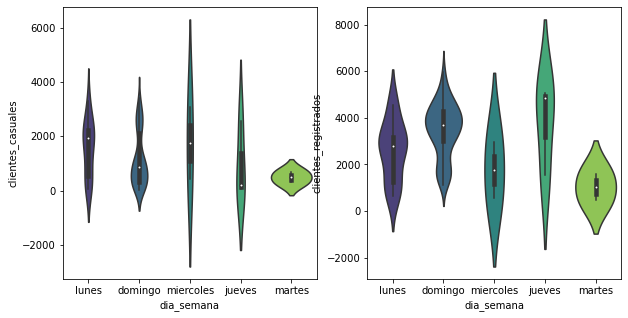

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


sns.violinplot(
    x       = 'dia_semana',
    y       = 'clientes_casuales',
    data    = df_no_laborables,
    palette = 'viridis',
    ax      = ax[0])

sns.violinplot(
    x       = 'dia_semana',
    y       = 'clientes_registrados',
    data    = df_no_laborables,
    palette = 'viridis',
    ax      = ax[1])

<AxesSubplot:xlabel='dia_semana', ylabel='clientes_registrados'>

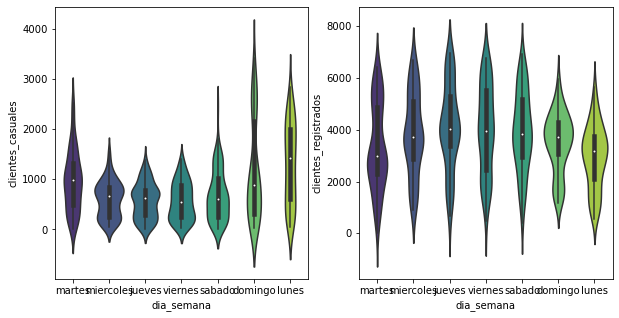

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


sns.violinplot(
    x       = 'dia_semana',
    y       = 'clientes_casuales',
    data    = df_laborables,
    palette = 'viridis',
    ax      = ax[0])


sns.violinplot(
    x       = 'dia_semana',
    y       = 'clientes_registrados',
    data    = df_laborables,
    palette = 'viridis',
    ax      = ax[1])

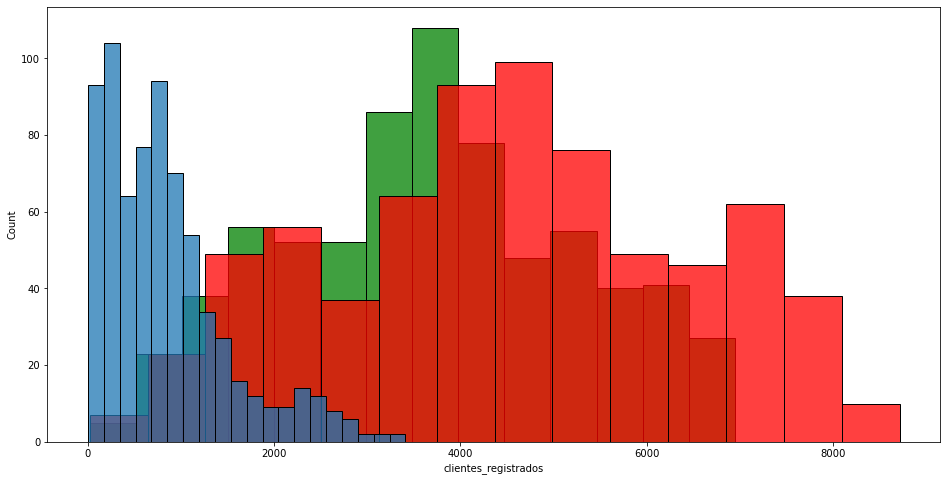

In [54]:
sns.histplot(df_laborables['clientes_registrados'], color='green')
sns.histplot(df_laborables['total_bicis'],color='red')
sns.histplot(df_laborables['clientes_casuales']);

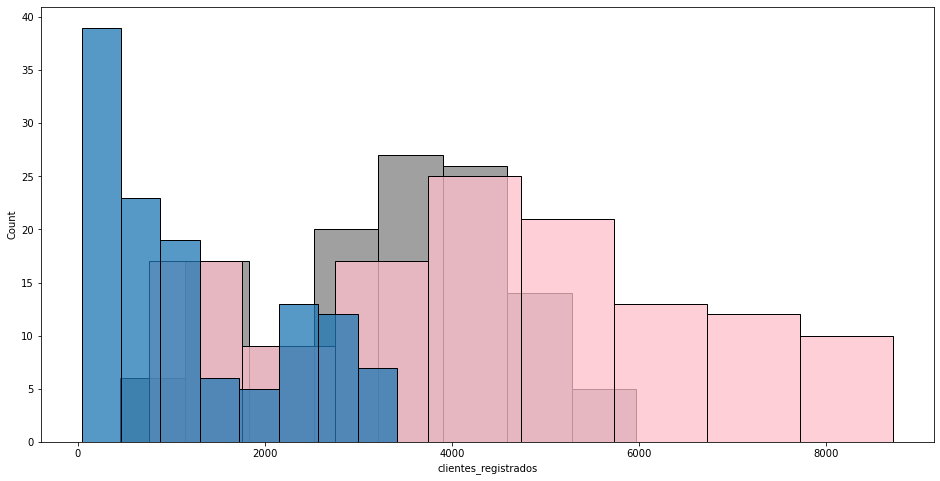

In [56]:
sns.histplot(df_no_laborables['clientes_registrados'], color='grey')
sns.histplot(df_no_laborables['total_bicis'],color='pink')
sns.histplot(df_no_laborables['clientes_casuales']);

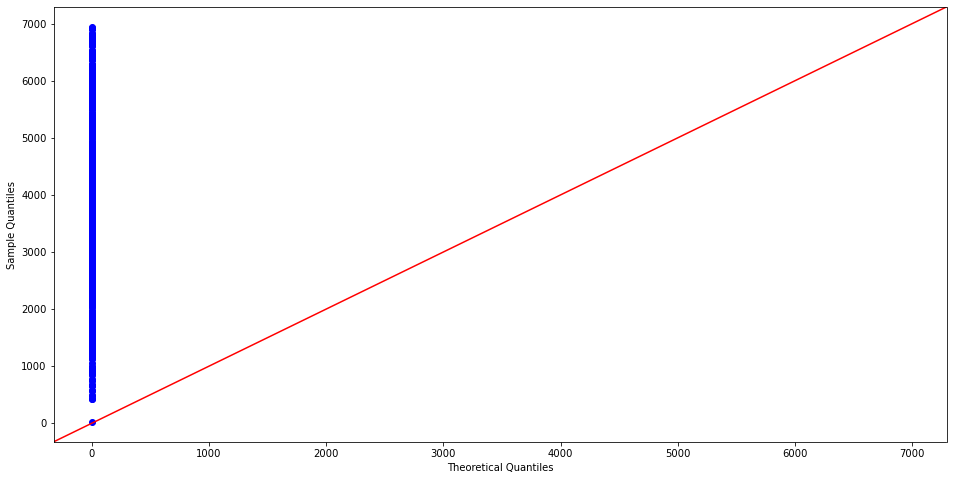

In [44]:
import statsmodels.api as sm

sm.qqplot(df_laborables['clientes_registrados'], line ='45');


In [45]:
from scipy.stats import kstest
kstest(df_laborables['clientes_registrados'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [46]:
from scipy import stats

In [48]:
df_laborables['clientes_registrados_norm'], lambda_ajustada = stats.boxcox(df_laborables['clientes_registrados'])

In [49]:
from scipy.stats import kstest
kstest(df_laborables['clientes_registrados_norm'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [72]:
df_laborables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 729
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 502 non-null    object 
 1   estacion              502 non-null    object 
 2   año                   502 non-null    int64  
 3   mes                   502 non-null    int64  
 4   dias_festivos         502 non-null    object 
 5   dias_laborales        502 non-null    int64  
 6   clima                 502 non-null    object 
 7   temperatura           502 non-null    float64
 8   humedad               502 non-null    float64
 9   velocidad_viento      502 non-null    float64
 10  clientes_casuales     502 non-null    int64  
 11  clientes_registrados  502 non-null    int64  
 12  total_bicis           502 non-null    int64  
 13  dia_semana            502 non-null    object 
dtypes: float64(3), int64(6), object(5)
memory usage: 75.0+ KB


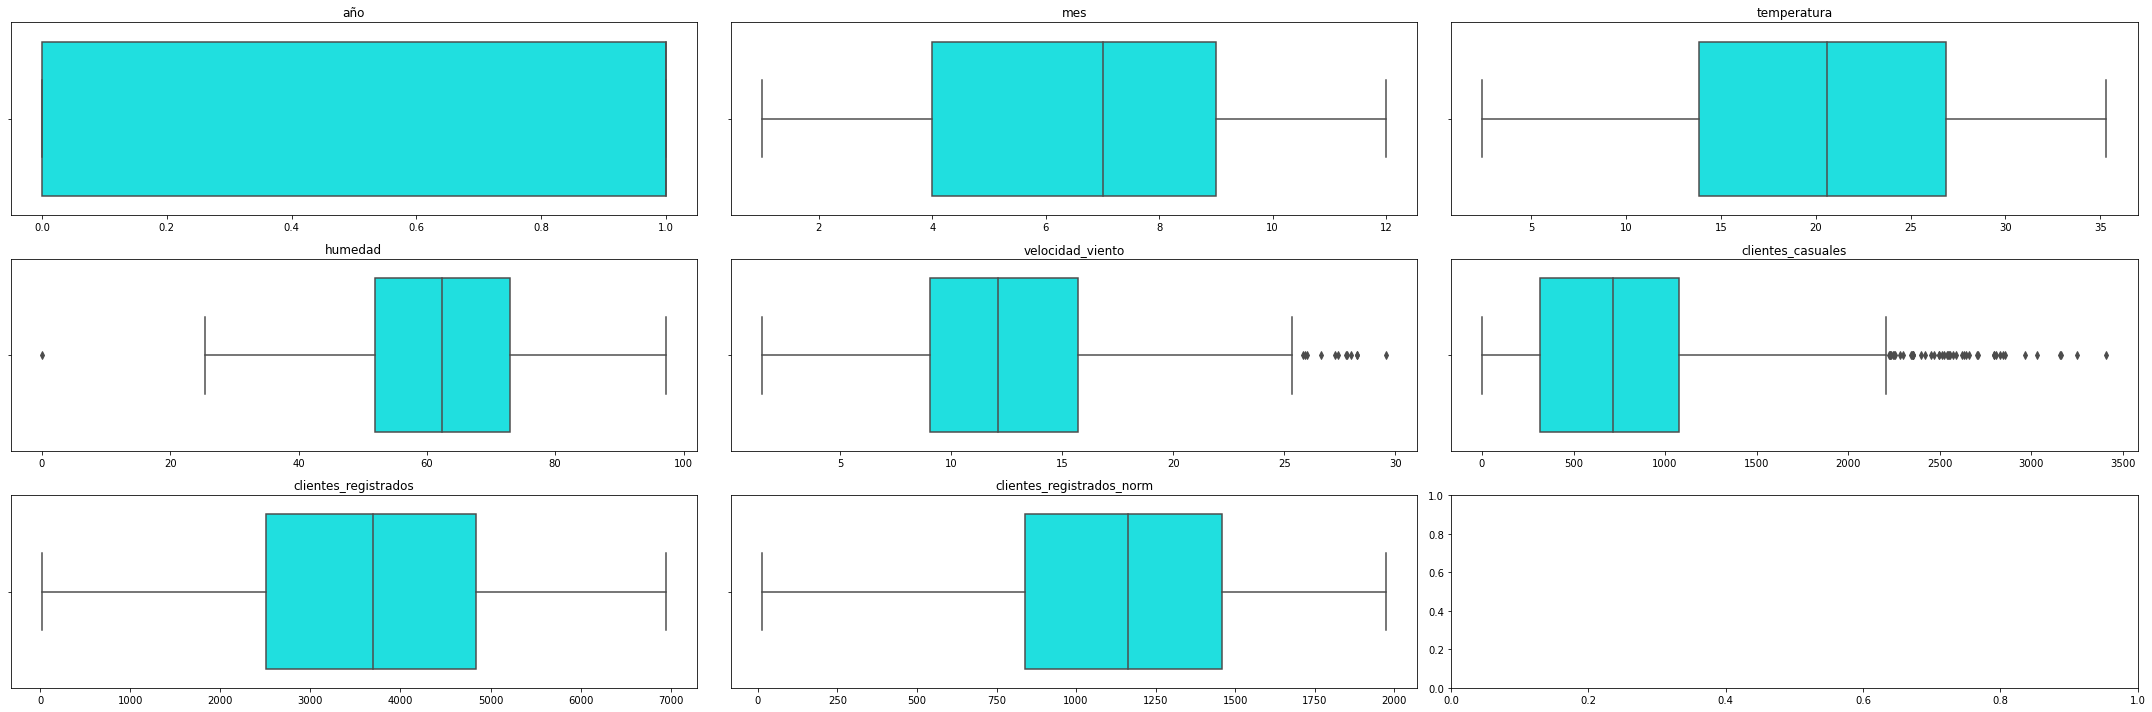

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(30,10))

categorias = df_laborables.select_dtypes(np.number).drop("total_bicis", axis = 1).columns

axes = axes.flat

for indice, cate in enumerate(categorias):

    sns.boxplot(x = df_laborables[cate], data = df_laborables, ax=axes[indice], color = "cyan"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

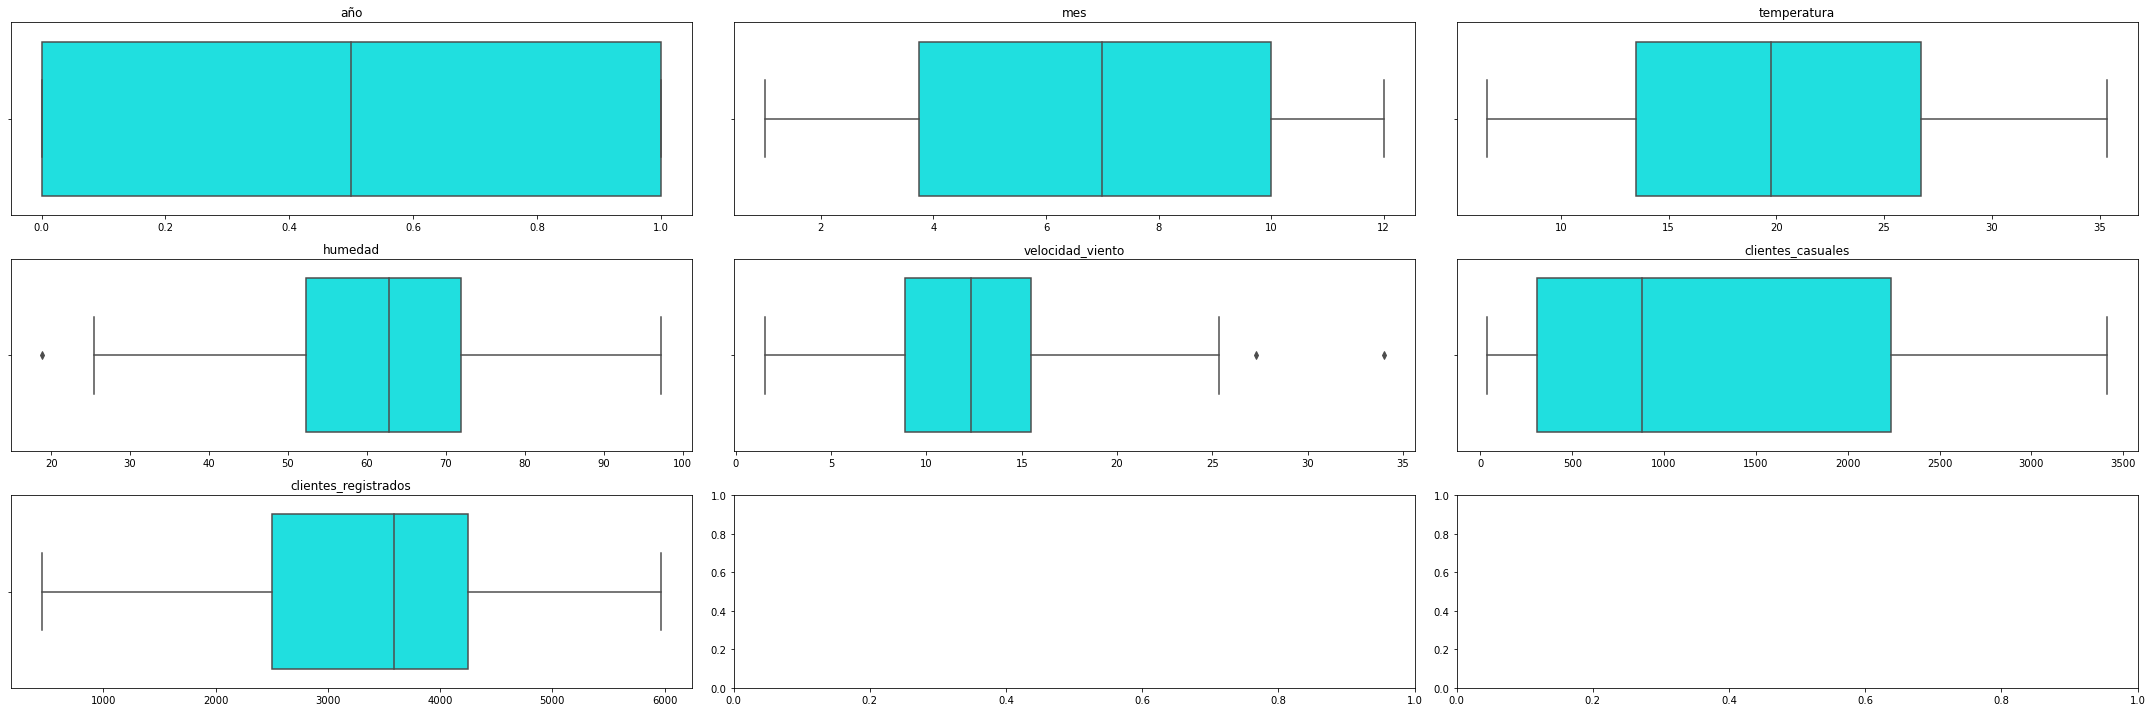

In [58]:
fig, axes = plt.subplots(3, 3, figsize=(30,10))

categorias = df_no_laborables.select_dtypes(np.number).drop("total_bicis", axis = 1).columns

axes = axes.flat

for indice, cate in enumerate(categorias):

    sns.boxplot(x = df_no_laborables[cate], data = df_no_laborables, ax=axes[indice], color = "cyan"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();